In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# 1. Data loading and preparation

In [3]:
# data source: https://snap.stanford.edu/data/facebook-large-page-page-network.html

nodes = pd.read_csv("musae_facebook_target.csv")
edges = pd.read_csv("musae_facebook_edges.csv")
edges = edges.astype("int")

In [4]:
nodes.head()

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician


In [5]:
nodes.shape

(22470, 4)

In [6]:
with open("musae_facebook_features.json") as json_data:
    data = json.load(json_data)

col_names = []
for i in range(31):
    a = '{}{}'.format('f', i)
    col_names.append(a)

features = pd.DataFrame.from_dict(data=data, orient='index', columns=col_names)
features['id'] = features.index
features.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f22,f23,f24,f25,f26,f27,f28,f29,f30,id
554,2835,4518,2198,2014.0,3818.0,3045.0,4570.0,4585.0,4596.0,4599.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554
10772,3293,2534,979,2014.0,2317.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10772
6350,4477,2895,4039,3282.0,765.0,2669.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6350
9218,3133,2052,979,3355.0,107.0,1878.0,1105.0,4571.0,4582.0,4593.0,...,4713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9218
7787,1151,631,2613,2791.0,648.0,1684.0,3818.0,107.0,1878.0,1105.0,...,4678.0,4695.0,4696.0,4708.0,NaN,NaN,NaN,NaN,NaN,7787


In [7]:
# impute null values with mean values

features_name = []
for i in range(31):
    a = '{}{}'.format('f',i)
    features_name.append(a)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
features_tf = imputer.fit_transform(features.iloc[:, :-1])
features_tf = pd.DataFrame(features_tf, columns=features_name, index = features.index)
features_tf = features_tf.astype('int')
features_tf.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
554,2835,4518,2198,2014,3818,3045,4570,4585,4596,4599,...,4708,4699,4702,4704,4705,4706,4705,4707,4707,4708
10772,3293,2534,979,2014,2317,2397,2530,2890,3440,4055,...,4693,4699,4702,4704,4705,4706,4705,4707,4707,4708
6350,4477,2895,4039,3282,765,2669,2530,2890,3440,4055,...,4693,4699,4702,4704,4705,4706,4705,4707,4707,4708
9218,3133,2052,979,3355,107,1878,1105,4571,4582,4593,...,4704,4713,4702,4704,4705,4706,4705,4707,4707,4708
7787,1151,631,2613,2791,648,1684,3818,107,1878,1105,...,4670,4678,4695,4696,4708,4706,4705,4707,4707,4708


In [8]:
features_tf.shape

(22470, 31)

In [9]:
# check data distribution of feature_tf df

# plt.figure(figsize=(15,6))
# ax = sns.violinplot(data=features_tf)
# _ = ax.set_xticklabels(features_name, rotation=90)

In [10]:
# detect outliers

# q25 = features_tf.quantile(0.25)
# q75 = features_tf.quantile(0.75)
# iqr = q75-q25

# mask = (features_tf < (q25 - 1.5*iqr)) | (features_tf > (q75 + 1.5*iqr)) # set the cap
# features_tf[mask] = np.nan # set the cap from the dataframe

In [11]:
# concatenate with id var

features_tf = pd.concat([features_tf, features.id], axis=1)
features_tf.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f22,f23,f24,f25,f26,f27,f28,f29,f30,id
554,2835,4518,2198,2014,3818,3045,4570,4585,4596,4599,...,4699,4702,4704,4705,4706,4705,4707,4707,4708,554
10772,3293,2534,979,2014,2317,2397,2530,2890,3440,4055,...,4699,4702,4704,4705,4706,4705,4707,4707,4708,10772
6350,4477,2895,4039,3282,765,2669,2530,2890,3440,4055,...,4699,4702,4704,4705,4706,4705,4707,4707,4708,6350
9218,3133,2052,979,3355,107,1878,1105,4571,4582,4593,...,4713,4702,4704,4705,4706,4705,4707,4707,4708,9218
7787,1151,631,2613,2791,648,1684,3818,107,1878,1105,...,4678,4695,4696,4708,4706,4705,4707,4707,4708,7787


In [12]:
# drop nan values from outlier detection

# features_tf.dropna(inplace=True) 
# features_tf.shape

In [13]:
# plt.figure(figsize=(15,6))
# ax2 = sns.violinplot(data=features_tf.iloc[:, :-1])
# _ = ax2.set_xticklabels(features_name, rotation=90)

In [14]:
# normalize the data

from sklearn.preprocessing import StandardScaler

mm = StandardScaler()
features_scaled = mm.fit_transform(features_tf.iloc[:, :-1])
features_scaled = pd.DataFrame(features_scaled, columns=features_name, index = features_tf.index)
features_scaled = pd.concat([features_scaled, features_tf.id], axis=1)
features_scaled.id = features_scaled.id.astype('int')

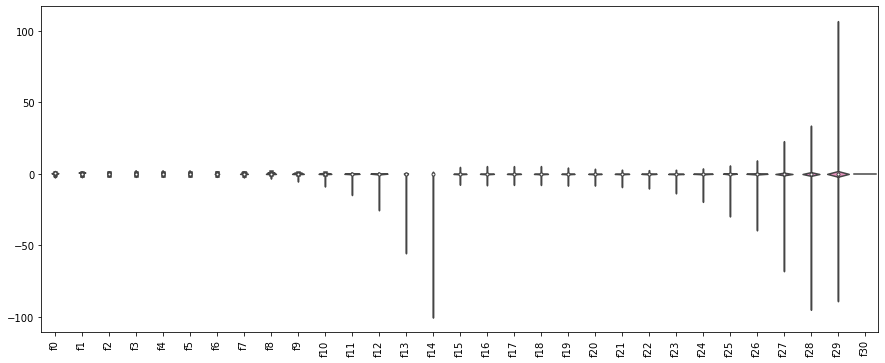

In [15]:
plt.figure(figsize=(15,6))
ax2 = sns.violinplot(data=features_scaled.iloc[:, :-1])
_ = ax2.set_xticklabels(features_name, rotation=90)

In [16]:
# remove feature variables with value = 0

features_selected = ['{}{}'.format('f', i) for i in range(30)]
features_scaled = features_scaled[features_selected]
features_scaled['id'] = features_scaled.index.astype('int')
features_scaled.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,id
554,-0.007785,1.461122,-0.130119,-0.185665,1.161585,0.485814,1.523120,1.320769,1.025445,0.688097,...,1.996603,-0.002801,-0.030326,-0.016600,-0.006109,0.0,-0.004157,-0.005967,-0.002375,554
10772,0.472523,-0.114964,-1.016775,-0.185665,-0.008433,-0.000152,-0.000482,-0.000174,-0.000100,-0.000403,...,-0.020437,-0.002801,-0.030326,-0.016600,-0.006109,0.0,-0.004157,-0.005967,-0.002375,10772
6350,1.714192,0.171814,1.208959,0.863444,-1.218204,0.203834,-0.000482,-0.000174,-0.000100,-0.000403,...,-0.020437,-0.002801,-0.030326,-0.016600,-0.006109,0.0,-0.004157,-0.005967,-0.002375,6350
9218,0.304730,-0.497863,-1.016775,0.923843,-1.731110,-0.389374,-1.064763,1.309859,1.013025,0.680504,...,1.458726,2.372091,-0.030326,-0.016600,-0.006109,0.0,-0.004157,-0.005967,-0.002375,9218
7787,-1.773808,-1.626703,0.171738,0.457204,-1.309404,-0.534864,0.961478,-2.169014,-1.385828,-3.733997,...,-3.113232,-3.565139,-1.731477,-3.177621,2.105710,0.0,-0.004157,-0.005967,-0.002375,7787


In [17]:
# merge features into nodes dataframe

nodes = nodes.merge(features_scaled, how ='inner', on='id')
nodes.head()

,id,facebook_id,page_name,page_type,f0,f1,f2,f3,f4,f5,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
0,0,145647315578475,The Voice of China 中国好声音,tvshow,0.304730,0.910604,-1.557207,-1.128870,-0.978900,-1.690532,...,-0.041743,-0.020437,-0.002801,-0.030326,-0.0166,-0.006109,0.0,-0.004157,-0.005967,-0.002375
1,1,191483281412,U.S. Consulate General Mumbai,government,0.583686,-1.653712,-1.016775,-0.185665,-0.000638,-0.000152,...,-0.041743,-0.020437,-0.002801,-0.030326,-0.0166,-0.006109,0.0,-0.004157,-0.005967,-0.002375
2,2,144761358898518,ESET,company,0.566907,0.916165,-0.248679,-1.219054,1.281626,0.725047,...,0.078431,-0.692783,-0.342071,2.642910,-0.0166,-0.006109,0.0,-0.004157,-0.005967,-0.002375
3,3,568700043198473,Consulate General of Switzerland in Montreal,government,-0.138873,-0.570948,-0.317778,1.882768,1.567700,-1.227065,...,-0.041743,-0.020437,-0.002801,-0.030326,-0.0166,-0.006109,0.0,-0.004157,-0.005967,-0.002375
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician,0.032066,1.461122,1.569731,-0.526543,0.913706,1.544739,...,-0.041743,-0.020437,-0.002801,-0.030326,-0.0166,-0.006109,0.0,-0.004157,-0.005967,-0.002375


In [18]:
nodes.shape

(22470, 34)

In [19]:
# 3. Graph Creation

In [20]:
# remove id from edges which are not in nodes

node_id_unique = list(nodes.id.unique())
edges = edges[edges['id_1'].isin(node_id_unique)]
edges = edges[edges['id_2'].isin(node_id_unique)]

In [21]:
import networkx as nx 

G = nx.Graph()

# add nodes
for node in nodes.iloc[:,0]:
    G.add_node(int(node))

# add edges
edge_1 = list(edges['id_1'])
edge_2 = list(edges['id_2'])

for i, j in zip(edge_1, edge_2):
    G.add_edge(int(i), int(j))

In [22]:
G.number_of_nodes()

22470

In [23]:
G.number_of_edges()

171002

In [24]:
# 4. Graph Neural Network Modelling

In [25]:
# define the feature variables

feature = nodes[features_selected]
feature = feature.set_index(nodes['id'])

In [26]:
# check target distribution and whether imbalance occurs

label = nodes['page_type']

from collections import Counter
Counter(label)

Counter({'tvshow': 3327,
         'government': 6880,
         'company': 6495,
         'politician': 5768})

In [27]:
# label encode the label variable

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
target = lb.fit_transform(label)

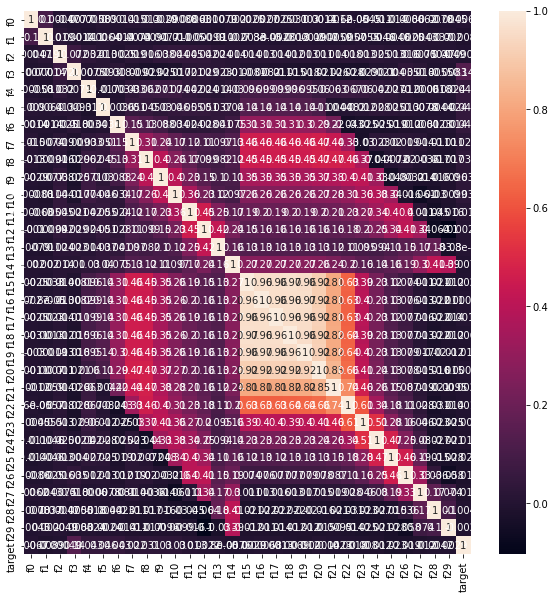

In [28]:
# check the correlation of feature and target variables

target = pd.DataFrame(target, columns=['target'])
df_feature_target = pd.concat([feature, target], axis=1)
cor = df_feature_target.corr()

plt.figure(figsize=(10,10))
sns.heatmap(cor, xticklabels=df_feature_target.columns, yticklabels=df_feature_target.columns, annot=True)
plt.show()

In [30]:
# one-hot encode the target variable

from keras.utils import np_utils
target = np_utils.to_categorical(target)

In [31]:
# impute class weights to compensate for class imbalance
# class weights will be applied when fitting the model

from sklearn.utils.class_weight import compute_class_weight

target_lst = np.argmax(target, axis=1)
class_weights = compute_class_weight("balanced", np.unique(target_lst), target_lst)
dict(zip(np.unique(target_lst), class_weights))

{0: 0.8648960739030023,
 1: 0.8164970930232558,
 2: 0.9739077669902912,
 3: 1.6884580703336338}

In [123]:
# split the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature, target, train_size=0.7, random_state=42)

In [124]:
# compute class weights for both train and test targets

y_train_lst = np.argmax(y_train, axis=1)
train_class_weight = dict(zip(np.unique(y_train_lst), class_weights))

In [125]:
# create the graph model

import stellargraph as sg
from stellargraph.mapper import GraphSAGENodeGenerator, FullBatchNodeGenerator
from stellargraph.layer import GraphSAGE, GCN, GAT
from stellargraph import globalvar

In [126]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses, metrics, Model

In [127]:
gnn = sg.StellarGraph.from_networkx(G, node_features=feature)

In [158]:
# model preparation

batch_size = 200
num_samples = [25, 10] # a 2-level model with 10 nodes in the 1st layer, followed by 5

# a generator is required to send node features in sampled subgraphs to keras
generator = GraphSAGENodeGenerator(gnn, batch_size=batch_size, num_samples=num_samples) 

# flow train dataset to the generator for training
train_gen = generator.flow(x_train.index, y_train, shuffle=True)

In [159]:
# specify the model

graphsage = GraphSAGE(layer_sizes=[64,64], generator=generator, bias=True, kernel_regularizer='l2')
x_in, x_out = graphsage.in_out_tensors()
hidden_layer = layers.Dense(units=128, activation='relu')(x_out)
hidden_layer2 = layers.Dense(units=64, activation='relu')(hidden_layer)
hidden_layer3 = layers.Dense(units=32, activation='relu')(hidden_layer2)
hidden_layer4 = layers.Dense(units=16, activation='relu')(hidden_layer3)
prediction = layers.Dense(units=4, activation='softmax')(hidden_layer4)

In [191]:
model = Model(inputs=x_in, outputs=prediction)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['acc'])

In [192]:
test_gen = generator.flow(x_test.index, y_test)

In [193]:
history = model.fit(train_gen, validation_data=test_gen, epochs=30, verbose=2, shuffle=False, class_weight=train_class_weight)

Epoch 1/30
79/79 - 40s - loss: 0.4836 - acc: 0.8696 - val_loss: 0.5102 - val_acc: 0.8595
Epoch 2/30
79/79 - 32s - loss: 0.4495 - acc: 0.8822 - val_loss: 0.5106 - val_acc: 0.8625
Epoch 3/30
79/79 - 31s - loss: 0.4328 - acc: 0.8849 - val_loss: 0.5060 - val_acc: 0.8665
Epoch 4/30
79/79 - 32s - loss: 0.4218 - acc: 0.8852 - val_loss: 0.5163 - val_acc: 0.8603
Epoch 5/30
79/79 - 33s - loss: 0.4158 - acc: 0.8884 - val_loss: 0.5115 - val_acc: 0.8632
Epoch 6/30
79/79 - 32s - loss: 0.4093 - acc: 0.8917 - val_loss: 0.5085 - val_acc: 0.8597
Epoch 7/30
79/79 - 38s - loss: 0.4089 - acc: 0.8884 - val_loss: 0.4996 - val_acc: 0.8661
Epoch 8/30
79/79 - 37s - loss: 0.4004 - acc: 0.8909 - val_loss: 0.5085 - val_acc: 0.8586
Epoch 9/30
79/79 - 34s - loss: 0.4012 - acc: 0.8896 - val_loss: 0.4902 - val_acc: 0.8675
Epoch 10/30
79/79 - 35s - loss: 0.3963 - acc: 0.8898 - val_loss: 0.4949 - val_acc: 0.8661
Epoch 11/30
79/79 - 37s - loss: 0.3891 - acc: 0.8947 - val_loss: 0.4939 - val_acc: 0.8628
Epoch 12/30
79/79 -

In [194]:
model.evaluate(train_gen)
model.evaluate(test_gen)

34/34 [==============================] - 10s 292ms/step - loss: 0.5023 - acc: 0.8644


[0.5022794008255005, 0.8644319176673889]

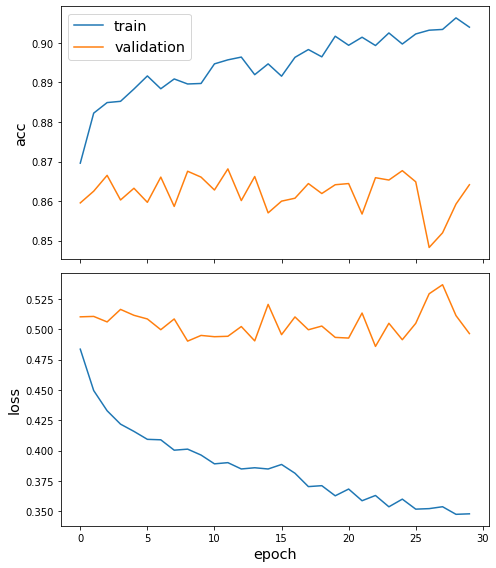

In [195]:
sg.utils.plot_history(history)

In [283]:
# make predictions
y_pred = model.predict(test_gen)

In [290]:
# inverse probabilities to classes and labels

y_pred_class = [np.argmax(i, axis=None, out=None) for i in y_pred]
y_pred_label = lb.inverse_transform(y_pred_class)

y_test_class = [np.argmax(i, axis=None, out=None) for i in y_test]
y_test_label = lb.inverse_transform(y_test_class)

In [291]:
prediction_df = pd.DataFrame({'Prediction Class': y_pred_class,
                              'Actual Class': y_test_class,
                              'Prediction Label': y_pred_label,
                              'Actual Label': y_test_label})

prediction_df.head()

,Prediction Class,Actual Class,Prediction Label,Actual Label
0,3,3,tvshow,tvshow
1,1,0,government,company
2,1,1,government,government
3,0,3,company,tvshow
4,0,2,company,politician


In [292]:
# confusion matrix

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(prediction_df['Actual Class'].values, prediction_df['Prediction Class'].values)
matrix_df = pd.DataFrame(matrix, columns=range(4), index=range(4))
matrix_df.head()

,0,1,2,3
0,1582,111,78,210
1,75,1819,93,41
2,36,73,1571,50
3,77,32,32,862


In [302]:
# classification report

from sklearn.metrics import classification_report

report = classification_report(y_test_class, y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1981
           1       0.89      0.90      0.90      2028
           2       0.89      0.91      0.90      1730
           3       0.74      0.86      0.80      1003

    accuracy                           0.87      6742
   macro avg       0.85      0.87      0.86      6742
weighted avg       0.87      0.87      0.87      6742

